In [ ]:
# change directory location if needed:    
data_dir = "/scratch/new_courier_pilot/" ## pilot data directory
# data_dir = "/scratch/EFRCourier_reports/" ## hospital data directory
time_window=10000 # you can chose how long do you want to visualize the data
exp = 'EFRCourierOpenLoop'
subject = 'R1620J' 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import argparse
import glob
import cmlreaders as cml
import json
from matplotlib.ticker import FuncFormatter
import warnings
import numpy as np
import pandas as pd

# Get the full data index
whole_df = cml.CMLReader.get_data_index()

# Define the experiment
exp = 'EFRCourierOpenLoop'

# Get unique subjects for the experiment
subjects = whole_df.query('experiment == @exp')['subject'].unique()

# Initialize results storage
results = []

# Loop through each subject
for subject in subjects:
    print(f"Processing subject: {subject}")
    
    # Get subject data
    sub_df = whole_df.query('experiment == @exp and subject == @subject')
    
    # Get all sessions for this subject
    sessions = sub_df['session'].unique()
    
    # Loop through each session
    for session in sessions:
        print(f"  Processing session: {session}")
        
        try:
            # Create reader for this subject and session
            reader = cml.CMLReader(subject, exp, session=session)
            evs = reader.load('task_events')
            
            # Find wordlist indices
            evs_wordlist_indice = evs[evs['type'] == 'WORDS'].index - 1
            
            # Extract pulse frequency data and word data types
            pulse_freq_data = []
            word_data_type = []
            
            for i in range(len(evs['stim_params'])):
                freq_data = evs['stim_params'].iloc[i]['burst_freq']
                word_data = evs['type'].iloc[i]
                pulse_freq_data.append(freq_data)
                word_data_type.append(word_data)
            
            # Find indices for different stimulation frequencies
            indices_with_8 = np.where(np.array(pulse_freq_data) == 8)[0] + 1
            indices_with_8 = indices_with_8.tolist()
            
            indices_with_3 = np.where(np.array(pulse_freq_data) == 3)[0] + 1
            indices_with_3 = indices_with_3.tolist()
            
            indices_with_no = np.where(np.array(pulse_freq_data)[:-1] == -1)[0] + 1
            indices_with_no = indices_with_no.tolist()
            
            # Filter events by stimulation type
            result_8HZ_encoding = evs[(evs.index.isin(indices_with_8))]
            result_3HZ_encoding = evs[(evs.index.isin(indices_with_3))]
            result_no_encoding = evs[(evs.index.isin(indices_with_no))]
            
            # Get stimulated words for each condition
            Stimuli_words_8 = result_8HZ_encoding[result_8HZ_encoding['type'] == 'WORD']
            Stimuli_words_3 = result_3HZ_encoding[result_3HZ_encoding['type'] == 'WORD']
            Stimuli_words_no = result_no_encoding[result_no_encoding['type'] == 'WORD']
            
            # Calculate recall rates
            if len(Stimuli_words_no) > 0:
                Recalled_results_no = Stimuli_words_no['recalled'].sum() / len(Stimuli_words_no['recalled'])
            else:
                Recalled_results_no = np.nan
                
            if len(Stimuli_words_3) > 0:
                Recalled_results_3hz = Stimuli_words_3['recalled'].sum() / len(Stimuli_words_3['recalled'])
            else:
                Recalled_results_3hz = np.nan
                
            if len(Stimuli_words_8) > 0:
                Recalled_results_8hz = Stimuli_words_8['recalled'].sum() / len(Stimuli_words_8['recalled'])
            else:
                Recalled_results_8hz = np.nan
            
            # Store results
            session_result = {
                'subject': subject,
                'session': session,
                'recall_no_stim': Recalled_results_no,
                'recall_3hz': Recalled_results_3hz,
                'recall_8hz': Recalled_results_8hz,
                'n_words_no_stim': len(Stimuli_words_no),
                'n_words_3hz': len(Stimuli_words_3),
                'n_words_8hz': len(Stimuli_words_8)
            }
            
            results.append(session_result)
            
            print(f"    No stim recall: {Recalled_results_no:.3f} ({len(Stimuli_words_no)} words)")
            print(f"    3Hz recall: {Recalled_results_3hz:.3f} ({len(Stimuli_words_3)} words)")
            print(f"    8Hz recall: {Recalled_results_8hz:.3f} ({len(Stimuli_words_8)} words)")
            
        except Exception as e:
            print(f"    Error processing session {session}: {str(e)}")
            continue

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display summary statistics
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)

if len(results_df) > 0:
    print(f"Total subjects processed: {results_df['subject'].nunique()}")
    print(f"Total sessions processed: {len(results_df)}")
    print(f"\nMean recall rates across all sessions:")
    print(f"No stimulation: {results_df['recall_no_stim'].mean():.3f} ± {results_df['recall_no_stim'].std():.3f}")
    print(f"3Hz stimulation: {results_df['recall_3hz'].mean():.3f} ± {results_df['recall_3hz'].std():.3f}")
    print(f"8Hz stimulation: {results_df['recall_8hz'].mean():.3f} ± {results_df['recall_8hz'].std():.3f}")
    
    # Display the results DataFrame
    print(f"\nDetailed results:")
    print(results_df.to_string(index=False))
else:
    print("No results to display. Check for errors in processing.")

In [ ]:
data_dir = "/scratch/new_courier_pilot/" ## pilot
exp = 'EFRCourierOpenLoop'
subject = 'R1620J' 
session=1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import os
import sys
import argparse
import glob
import cmlreaders as cml
import json
from matplotlib.ticker import FuncFormatter
import warnings
import numpy as np
import pandas as pd

reader = cml.CMLReader(subject, exp, session=session)
evs = reader.load('task_events')

# Find wordlist indices
evs_wordlist_indice = evs[evs['type'] == 'WORDS'].index - 1

# Extract pulse frequency data and word data types
pulse_freq_data = []
word_data_type = []

for i in range(len(evs['stim_params'])):
    freq_data = evs['stim_params'].iloc[i]['burst_freq']
    word_data = evs['type'].iloc[i]
    pulse_freq_data.append(freq_data)
    word_data_type.append(word_data)

# Find indices for different stimulation frequencies
indices_with_8 = np.where(np.array(pulse_freq_data) == 8)[0] + 1
indices_with_8 = indices_with_8.tolist()

indices_with_3 = np.where(np.array(pulse_freq_data) == 3)[0] + 1
indices_with_3 = indices_with_3.tolist()

indices_with_no = np.where(np.array(pulse_freq_data)[:-1] == -1)[0] + 1
indices_with_no = indices_with_no.tolist()

# Filter events by stimulation type
result_8HZ_encoding = evs[(evs.index.isin(indices_with_8))]
result_3HZ_encoding = evs[(evs.index.isin(indices_with_3))]
result_no_encoding = evs[(evs.index.isin(indices_with_no))]

# Get stimulated words for each condition
Stimuli_words_8 = result_8HZ_encoding[result_8HZ_encoding['type'] == 'WORD']
Stimuli_words_3 = result_3HZ_encoding[result_3HZ_encoding['type'] == 'WORD']
Stimuli_words_no = result_no_encoding[result_no_encoding['type'] == 'WORD']

# Calculate recall rates
if len(Stimuli_words_no) > 0:
    Recalled_results_no = Stimuli_words_no['recalled'].sum() / len(Stimuli_words_no['recalled'])
else:
    Recalled_results_no = np.nan

if len(Stimuli_words_3) > 0:
    Recalled_results_3hz = Stimuli_words_3['recalled'].sum() / len(Stimuli_words_3['recalled'])
else:
    Recalled_results_3hz = np.nan

if len(Stimuli_words_8) > 0:
    Recalled_results_8hz = Stimuli_words_8['recalled'].sum() / len(Stimuli_words_8['recalled'])
else:
    Recalled_results_8hz = np.nan

# Store results
session_result = {
'subject': subject,
'session': session,
'recall_no_stim': Recalled_results_no,
'recall_3hz': Recalled_results_3hz,
'recall_8hz': Recalled_results_8hz,
'n_words_no_stim': len(Stimuli_words_no),
'n_words_3hz': len(Stimuli_words_3),
'n_words_8hz': len(Stimuli_words_8)
}

results.append(session_result)

print(f"    No stim recall: {Recalled_results_no:.3f} ({len(Stimuli_words_no)} words)")
print(f"    3Hz recall: {Recalled_results_3hz:.3f} ({len(Stimuli_words_3)} words)")
print(f"    8Hz recall: {Recalled_results_8hz:.3f} ({len(Stimuli_words_8)} words)")


# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display summary statistics

In [ ]:
evs['inside_stimuli'] = -999

stimuli_indices = evs[evs['type'] == 'STIM'].index
for i in stimuli_indices:
    current_offset = evs.loc[i, 'eegoffset']
    
    # Keep checking subsequent rows until difference >= 4000
    j = i + 1
    rows_to_assign = []  # Store indices of rows to assign
    
    while j < len(evs):
        next_offset = evs.loc[j, 'eegoffset']
        time_diff = abs(next_offset - current_offset)
        
        if time_diff < 4000:
            # Still within 4 seconds, add this row to assignment list
            rows_to_assign.append(j)
            j += 1
        else:
            # Found a row with difference >= 4000, stop checking
            break
    
    # Assign burst_freq to all rows that were within 4000ms of the STIM
    for row_idx in rows_to_assign:
        evs.loc[row_idx, 'inside_stimuli'] = evs.loc[i, 'stim_params']['burst_freq']
    
evs[evs['intrusion'] = 1']

In [ ]:
(evs['intrusion']>0).sum()


In [ ]:
evs

In [ ]:
(evs['intruded']=='0').sum()

In [ ]:
evs['intruded']

In [ ]:
# change directory location if needed:    
data_dir = "/scratch/new_courier_pilot/" ## pilot data directory
# data_dir = "/scratch/EFRCourier_reports/" ## hospital data directory
time_window=10000 # you can chose how long do you want to visualize the data
exp = 'EFRCourierOpenLoop'
subject = 'R1620J' 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import argparse
import glob
import cmlreaders as cml
import json
from matplotlib.ticker import FuncFormatter
import warnings
import numpy as np
import pandas as pd

# Get the full data index
whole_df = cml.CMLReader.get_data_index()

# Define the experiment
exp = 'EFRCourierOpenLoop'

# Get unique subjects for the experiment
subjects = whole_df.query('experiment == @exp')['subject'].unique()

# Initialize results storage
results = []

# Loop through each subject
for subject in subjects:
    print(f"Processing subject: {subject}")
    
    # Get subject data
    sub_df = whole_df.query('experiment == @exp and subject == @subject')
    
    # Get all sessions for this subject
    sessions = sub_df['session'].unique()
    
    # Loop through each session
    for session in sessions:
        print(f"  Processing session: {session}")
        
        try:
            # Create reader for this subject and session
            reader = cml.CMLReader(subject, exp, session=session)
            evs = reader.load('task_events')
            
            # Count intrusions (where intrusion > 0)
            intrusion_count = (evs['intrusion'] == -1).sum()
            
            # Store results
            session_result = {
                'subject': subject,
                'session': session,
                'intrusion_count': intrusion_count
            }
            
            results.append(session_result)
            
            print(f"    Intrusions: {intrusion_count}")
            
        except Exception as e:
            print(f"    Error processing session {session}: {str(e)}")
            continue

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display summary statistics
print("\n" + "="*50)
print("INTRUSION ANALYSIS SUMMARY")
print("="*50)

if len(results_df) > 0:
    print(f"Total subjects processed: {results_df['subject'].nunique()}")
    print(f"Total sessions processed: {len(results_df)}")
    print(f"\nIntrusion statistics across all sessions:")
    print(f"Mean intrusions per session: {results_df['intrusion_count'].mean():.3f} ± {results_df['intrusion_count'].std():.3f}")
    print(f"Total intrusions across all sessions: {results_df['intrusion_count'].sum()}")
    print(f"Min intrusions in a session: {results_df['intrusion_count'].min()}")
    print(f"Max intrusions in a session: {results_df['intrusion_count'].max()}")
    
    # Display the results DataFrame
    print(f"\nDetailed results:")
    print(results_df.to_string(index=False))
else:
    print("No results to display. Check for errors in processing.")

In [1]:
# change directory location if needed:    
data_dir = "/scratch/new_courier_pilot/" ## pilot data directory
# data_dir = "/scratch/EFRCourier_reports/" ## hospital data directory
time_window=10000 # you can chose how long do you want to visualize the data
exp = 'EFRCourierOpenLoop'
subject = 'R1620J' 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import argparse
import glob
import cmlreaders as cml
import json
from matplotlib.ticker import FuncFormatter
import warnings
import numpy as np
import pandas as pd

# Get the full data index
whole_df = cml.CMLReader.get_data_index()

# Define the experiment
exp = 'EFRCourierOpenLoop'

# Get unique subjects for the experiment
subjects = whole_df.query('experiment == @exp')['subject'].unique()

# Initialize results storage
results = []

# Loop through each subject
for subject in subjects:
    print(f"Processing subject: {subject}")
    
    # Get subject data
    sub_df = whole_df.query('experiment == @exp and subject == @subject')
    
    # Get all sessions for this subject
    sessions = sub_df['session'].unique()
    
    # Loop through each session
    for session in sessions:
        print(f"  Processing session: {session}")
        
        try:
            # Create reader for this subject and session
            reader = cml.CMLReader(subject, exp, session=session)
            evs = reader.load('task_events')
            
            # Add the inside_stimuli variable
            evs['inside_stimuli'] = -999
            stimuli_indices = evs[evs['type'] == 'STIM'].index
            for i in stimuli_indices:
                current_offset = evs.loc[i, 'eegoffset']
                
                # Keep checking subsequent rows until difference >= 4000
                j = i + 1
                rows_to_assign = []  # Store indices of rows to assign
                
                while j < len(evs):
                    next_offset = evs.loc[j, 'eegoffset']
                    time_diff = abs(next_offset - current_offset)
                    
                    if time_diff < 4000:
                        # Still within 4 seconds, add this row to assignment list
                        rows_to_assign.append(j)
                        j += 1
                    else:
                        # Found a row with difference >= 4000, stop checking
                        break
                
                # Assign burst_freq to all rows that were within 4000ms of the STIM
                for row_idx in rows_to_assign:
                    evs.loc[row_idx, 'inside_stimuli'] = evs.loc[i, 'stim_params']['burst_freq']
            
            # Filter for intrusions (intrusion == 1)
            intrusion_events = evs[evs['intrusion'] >0]
            intrusion_count_3hz=[]
            # Count intrusions for each stimulation condition
            intrusion_count_3hz = (intrusion_events['inside_stimuli'] == 3).sum()
            intrusion_count_8hz = (intrusion_events['inside_stimuli'] == 8).sum()
            intrusion_count_no_stim = (intrusion_events['inside_stimuli'] == -999).sum()
            intrusion_count_total = len(intrusion_events)
            
            # Store results
            session_result = {
                'subject': subject,
                'session': session,
                'intrusion_count_3hz': intrusion_count_3hz,
                'intrusion_count_8hz': intrusion_count_8hz,
                'intrusion_count_no_stim': intrusion_count_no_stim,
                'intrusion_count_total': intrusion_count_total
            }
            
            results.append(session_result)
            
            print(f"    Intrusions - 3Hz: {intrusion_count_3hz}, 8Hz: {intrusion_count_8hz}, No stim: {intrusion_count_no_stim}, Total: {intrusion_count_total}")
            
        except Exception as e:
            print(f"    Error processing session {session}: {str(e)}")
            continue

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display summary statistics
print("\n" + "="*50)
print("INTRUSION ANALYSIS SUMMARY")
print("="*50)

if len(results_df) > 0:
    print(f"Total subjects processed: {results_df['subject'].nunique()}")
    print(f"Total sessions processed: {len(results_df)}")
    print(f"\nIntrusion statistics across all sessions:")
    print(f"Mean intrusions per session: {results_df['intrusion_count'].mean():.3f} ± {results_df['intrusion_count'].std():.3f}")
    print(f"Total intrusions across all sessions: {results_df['intrusion_count'].sum()}")
    print(f"Min intrusions in a session: {results_df['intrusion_count'].min()}")
    print(f"Max intrusions in a session: {results_df['intrusion_count'].max()}")
    
    # Display the results DataFrame
    print(f"\nDetailed results:")
    print(results_df.to_string(index=False))
else:
    print("No results to display. Check for errors in processing.")

Processing subject: FBG490
  Processing session: 0
    Intrusions - 3Hz: 0, 8Hz: 0, No stim: 0, Total: 0
  Processing session: 1
    Intrusions - 3Hz: 0, 8Hz: 0, No stim: 4, Total: 4
  Processing session: 2
    Intrusions - 3Hz: 0, 8Hz: 1, No stim: 1, Total: 2
Processing subject: FBG491
  Processing session: 1
    Intrusions - 3Hz: 1, 8Hz: 2, No stim: 6, Total: 9
  Processing session: 2
    Intrusions - 3Hz: 0, 8Hz: 0, No stim: 1, Total: 1
Processing subject: FR491
  Processing session: 1
    Error processing session 1: Unable to find the requested file in any of the expected locations:
 /protocols/pyfr/subjects/FR491/experiments/EFRCourierOpenLoop/sessions/1/behavioral/current_processed/task_events.json
/data/events/pyFR/FR491_None_events.mat
  Processing session: 2
    Error processing session 2: Unable to find the requested file in any of the expected locations:
 /protocols/pyfr/subjects/FR491/experiments/EFRCourierOpenLoop/sessions/2/behavioral/current_processed/task_events.json
/d

KeyError: 'intrusion_count'

In [1]:
# change directory location if needed:    
data_dir = "/scratch/new_courier_pilot/" ## pilot data directory
# data_dir = "/scratch/EFRCourier_reports/" ## hospital data directory
time_window=10000 # you can chose how long do you want to visualize the data
exp = 'EFRCourierOpenLoop'
subject = 'R1620J' 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import argparse
import glob
import cmlreaders as cml
import json
from matplotlib.ticker import FuncFormatter
import warnings
import numpy as np
import pandas as pd

# Get the full data index
whole_df = cml.CMLReader.get_data_index()

# Define the experiment
exp = 'EFRCourierOpenLoop'

# Get unique subjects for the experiment
subjects = whole_df.query('experiment == @exp')['subject'].unique()

# Initialize results storage
results = []

# Loop through each subject
for subject in subjects:
    print(f"Processing subject: {subject}")
    
    # Get subject data
    sub_df = whole_df.query('experiment == @exp and subject == @subject')
    
    # Get all sessions for this subject
    sessions = sub_df['session'].unique()
    
    # Loop through each session
    for session in sessions:
        print(f"  Processing session: {session}")
        
        try:
            # Create reader for this subject and session
            reader = cml.CMLReader(subject, exp, session=session)
            evs = reader.load('task_events')
            
            # Add the inside_stimuli variable
            evs['inside_stimuli'] = -999
            stimuli_indices = evs[evs['type'] == 'STIM'].index
            for i in stimuli_indices:
                current_offset = evs.loc[i, 'eegoffset']
                
                # Keep checking subsequent rows until difference >= 4000
                j = i + 1
                rows_to_assign = []  # Store indices of rows to assign
                
                while j < len(evs):
                    next_offset = evs.loc[j, 'eegoffset']
                    time_diff = abs(next_offset - current_offset)
                    
                    if time_diff < 3000:
                        # Still within 4 seconds, add this row to assignment list
                        rows_to_assign.append(j)
                        j += 1
                    else:
                        # Found a row with difference >= 4000, stop checking
                        break
                
                # Assign burst_freq to all rows that were within 4000ms of the STIM
                for row_idx in rows_to_assign:
                    evs.loc[row_idx, 'inside_stimuli'] = evs.loc[i, 'stim_params']['burst_freq']
            
            # Filter for intrusions (intrusion == 1)
            intrusion_events = evs[(evs['intrusion'] > 0) | (evs['intrusion'] == -1)]
            
            # Count intrusions for each stimulation condition
            intrusion_count_3hz = (intrusion_events['inside_stimuli'] == 3).sum()
            intrusion_count_8hz = (intrusion_events['inside_stimuli'] == 8).sum()
            intrusion_count_no_stim = (intrusion_events['inside_stimuli'] == -999).sum()
            intrusion_count_total = len(intrusion_events)
            
            # Store results
            session_result = {
                'subject': subject,
                'session': session,
                'intrusion_count_3hz': intrusion_count_3hz,
                'intrusion_count_8hz': intrusion_count_8hz,
                'intrusion_count_no_stim': intrusion_count_no_stim,
                'intrusion_count_total': intrusion_count_total
            }
            
            results.append(session_result)
            
            print(f"    Intrusions - 3Hz: {intrusion_count_3hz}, 8Hz: {intrusion_count_8hz}, No stim: {intrusion_count_no_stim}, Total: {intrusion_count_total}")
            
        except Exception as e:
            print(f"    Error processing session {session}: {str(e)}")
            continue

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display summary statistics
print("\n" + "="*50)
print("INTRUSION ANALYSIS SUMMARY")
print("="*50)

if len(results_df) > 0:
    print(f"Total subjects processed: {results_df['subject'].nunique()}")
    print(f"Total sessions processed: {len(results_df)}")
    print(f"\nIntrusion statistics across all sessions:")
    print(f"Mean intrusions per session:")
    print(f"  3Hz stimulation: {results_df['intrusion_count_3hz'].mean():.3f} ± {results_df['intrusion_count_3hz'].std():.3f}")
    print(f"  8Hz stimulation: {results_df['intrusion_count_8hz'].mean():.3f} ± {results_df['intrusion_count_8hz'].std():.3f}")
    print(f"  No stimulation: {results_df['intrusion_count_no_stim'].mean():.3f} ± {results_df['intrusion_count_no_stim'].std():.3f}")
    print(f"  Total: {results_df['intrusion_count_total'].mean():.3f} ± {results_df['intrusion_count_total'].std():.3f}")
    print(f"\nTotal intrusions across all sessions:")
    print(f"  3Hz stimulation: {results_df['intrusion_count_3hz'].sum()}")
    print(f"  8Hz stimulation: {results_df['intrusion_count_8hz'].sum()}")
    print(f"  No stimulation: {results_df['intrusion_count_no_stim'].sum()}")
    print(f"  Total: {results_df['intrusion_count_total'].sum()}")
    
    # Display the results DataFrame
    print(f"\nDetailed results:")
    print(results_df.to_string(index=False))
else:
    print("No results to display. Check for errors in processing.")

Processing subject: FBG490
  Processing session: 0
    Intrusions - 3Hz: 7, 8Hz: 2, No stim: 32, Total: 41
  Processing session: 1
    Intrusions - 3Hz: 4, 8Hz: 4, No stim: 53, Total: 61
  Processing session: 2
    Intrusions - 3Hz: 1, 8Hz: 4, No stim: 58, Total: 63
Processing subject: FBG491
  Processing session: 1
    Intrusions - 3Hz: 6, 8Hz: 4, No stim: 20, Total: 30
  Processing session: 2
    Intrusions - 3Hz: 4, 8Hz: 2, No stim: 19, Total: 25
Processing subject: FR491
  Processing session: 1
    Error processing session 1: Unable to find the requested file in any of the expected locations:
 /protocols/pyfr/subjects/FR491/experiments/EFRCourierOpenLoop/sessions/1/behavioral/current_processed/task_events.json
/data/events/pyFR/FR491_None_events.mat
  Processing session: 2
    Error processing session 2: Unable to find the requested file in any of the expected locations:
 /protocols/pyfr/subjects/FR491/experiments/EFRCourierOpenLoop/sessions/2/behavioral/current_processed/task_even

In [2]:
evs['finalrecalled'].unique()

array([-999,    0])

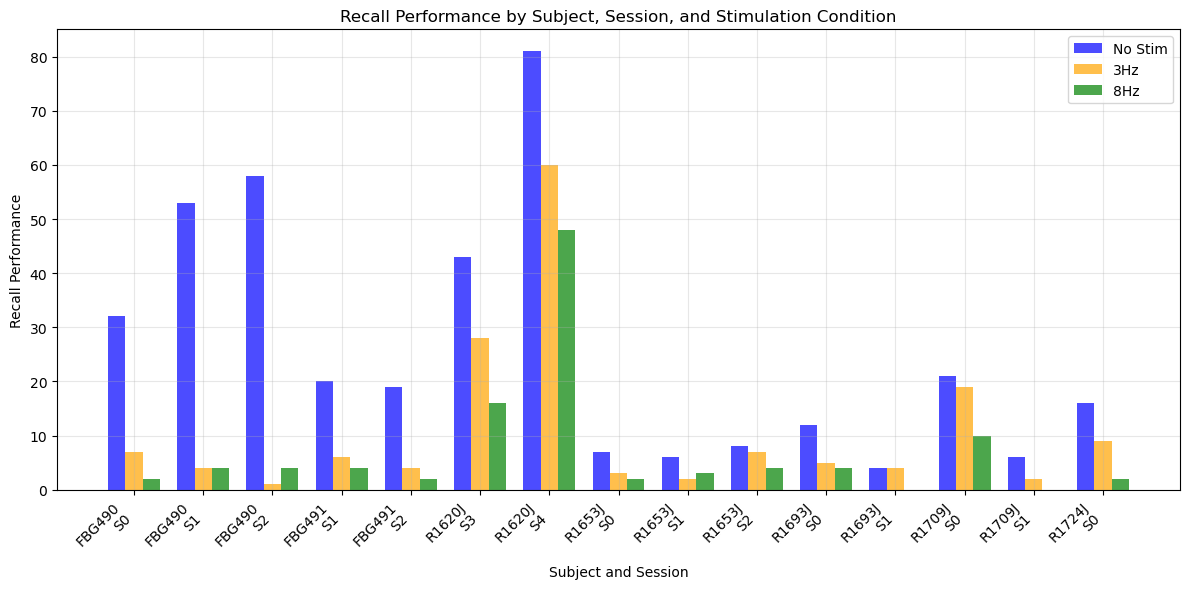

In [3]:
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique subjects
subjects = results_df['subject'].unique()
x_positions = []
labels = []

# Plot data for each subject and session
x_pos = 0
for subject in subjects:
    subject_data = results_df[results_df['subject'] == subject]
    
    for _, row in subject_data.iterrows():
        # Plot the three conditions
        ax.bar(x_pos - 0.25, row['intrusion_count_no_stim'], width=0.25, label='No Stim' if x_pos == 0 else "", color='blue', alpha=0.7)
        ax.bar(x_pos, row['intrusion_count_3hz'], width=0.25, label='3Hz' if x_pos == 0 else "", color='orange', alpha=0.7)
        ax.bar(x_pos + 0.25, row['intrusion_count_8hz'], width=0.25, label='8Hz' if x_pos == 0 else "", color='green', alpha=0.7)
        
        # Store position and label
        x_positions.append(x_pos)
        labels.append(f"{subject}\nS{row['session']}")
        
        x_pos += 1

# Customize the plot
ax.set_xlabel('Subject and Session')
ax.set_ylabel('Recall Performance')
ax.set_title('Recall Performance by Subject, Session, and Stimulation Condition')
ax.set_xticks(x_positions)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

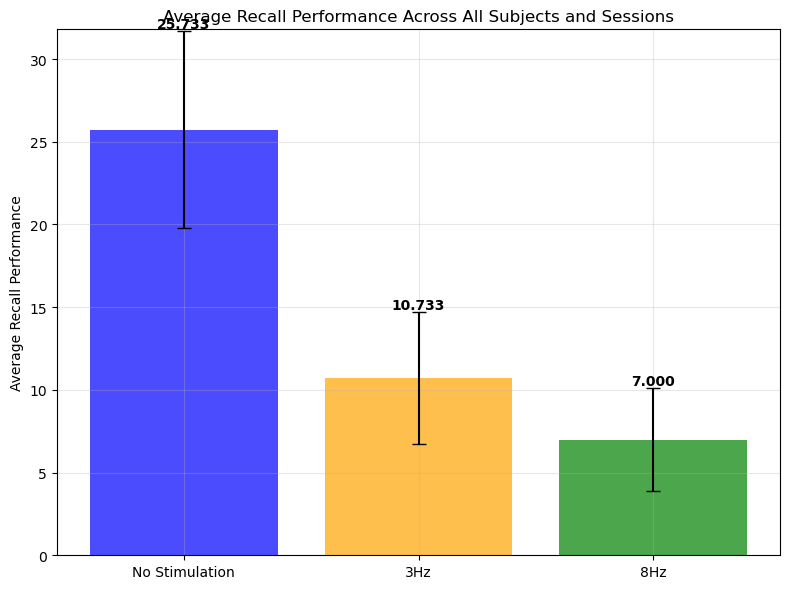

Average Recall Performance:
No Stimulation: 25.733 ± 5.967
3Hz Stimulation: 10.733 ± 3.978
8Hz Stimulation: 7.000 ± 3.109


In [4]:
avg_no_stim = results_df['intrusion_count_no_stim'].mean()
avg_3hz = results_df['intrusion_count_3hz'].mean()
avg_8hz = results_df['intrusion_count_8hz'].mean()

# Calculate standard errors
std_no_stim = results_df['intrusion_count_no_stim'].std() / np.sqrt(len(results_df))
std_3hz = results_df['intrusion_count_3hz'].std() / np.sqrt(len(results_df))
std_8hz = results_df['intrusion_count_8hz'].std() / np.sqrt(len(results_df))

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

conditions = ['No Stimulation', '3Hz', '8Hz']
means = [avg_no_stim, avg_3hz, avg_8hz]
errors = [std_no_stim, std_3hz, std_8hz]
colors = ['blue', 'orange', 'green']

bars = ax.bar(conditions, means, color=colors, alpha=0.7, capsize=5)
ax.errorbar(conditions, means, yerr=errors, fmt='none', color='black', capsize=5)

# Add value labels on bars
for i, (bar, mean) in enumerate(zip(bars, means)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + errors[i] + 0.01, 
            f'{mean:.3f}', ha='center', va='bottom', fontweight='bold')

# Customize the plot
ax.set_ylabel('Average Recall Performance')
ax.set_title('Average Recall Performance Across All Subjects and Sessions')
ax.set_ylim(0, max(means) + max(errors) + 0.1)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print the exact values
print(f"Average Recall Performance:")
print(f"No Stimulation: {avg_no_stim:.3f} ± {std_no_stim:.3f}")
print(f"3Hz Stimulation: {avg_3hz:.3f} ± {std_3hz:.3f}")
print(f"8Hz Stimulation: {avg_8hz:.3f} ± {std_8hz:.3f}")